In [7]:
import keras
import numpy as np
import pandas as pd
from keras.datasets import mnist
from keras.preprocessing.image import load_img , img_to_array
from keras.layers import Dense , Dropout , Input
from keras.models import Model

In [55]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [56]:
x_train = x_train.reshape(x_train.shape[0],np.prod(x_train.shape[1:]))
x_test = x_test.reshape(x_test.shape[0],np.prod(x_test.shape[1:]))

In [57]:
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0


In [58]:
x_train.shape[1]

784

In [59]:
input_img= Input(shape=(784,))
autoencoder=Dense(128,activation="relu")(input_img)
autoencoder=Dense(64,activation="relu")(autoencoder)
autoencoder=Dense(32,activation="relu")(autoencoder)
autoencoder=Dense(64,activation="relu")(autoencoder)
autoencoder=Dense(128,activation="relu")(autoencoder)
output_img=Dense(784,activation="sigmoid")(autoencoder)

In [60]:
encoder_decoder=Model(input_img,output_img)

In [61]:
encoder_decoder.compile(optimizer="adam",metrics=["accuracy"],loss="binary_crossentropy")

In [62]:
encoder_decoder.fit(x_train,x_train,epochs=10,batch_size=32)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1528 - accuracy: 0.0114
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1091 - accuracy: 0.0119
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0999 - accuracy: 0.0133
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0958 - accuracy: 0.0133
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0931 - accuracy: 0.0139
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0909 - accuracy: 0.0142
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0891 - accuracy: 0.0141
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0877 - accuracy: 0.0137
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0867 - accuracy: 0.0147
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.085

In [63]:
predictions=encoder_decoder.predict(x_test)

In [52]:
import matplotlib.pyplot as plt

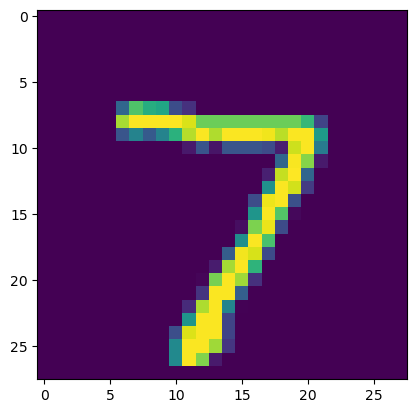

In [53]:
plt.imshow(x_test[0].reshape(28,28))

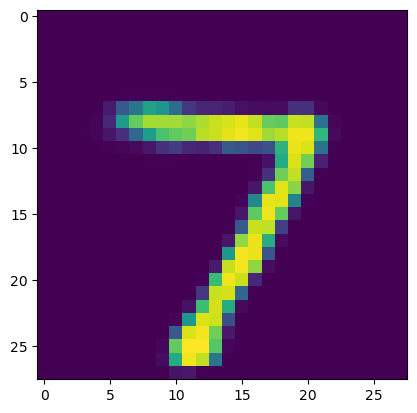

In [64]:
plt.imshow(predictions[0].reshape(28,28))